In [181]:
import matplotlib.pyplot as plt
import numpy as np
from Cell import Cell
from Population import Population

## Make populations

In [182]:
N_i = 100 # initial N
t_max = 1000
cell_type = None
trait = 0

R_i = {
    'A': 0,
    'B': 0,
    'C': 100
}
pop = Population([ Cell(trait=trait) for i in range(N_i) ], R_i, responsive=True, dorm=False)

## simulate

In [183]:
freqA = [pop.freq('A')]
mean_trait = [pop.trait_mean()]
trait_a = [pop.trait_mean('A')]
trait_b = [pop.trait_mean('B')]
D = [len(pop.dormant)]
Na = [pop.density('A')]
Nb = [pop.density('B')]
r_a = [R_i['A']]
r_b = [R_i['B']]
r_c = [R_i['C']]
R = [pop.R()]
Ra = [pop.R('A')]
Rb = [pop.R('B')]
Da = [pop.density_d('A')]
Db = [pop.density_d('B')]

from copy import deepcopy

for t in range(t_max):


    pop.timestep()

    pop.resources['C'] += 100

    R.append(pop.R())
    Ra.append(pop.R('A'))
    Rb.append(pop.R('B'))
    
    freqA.append(pop.freq('A'))
    Na.append(pop.density('A'))
    Nb.append(pop.density('B'))
    mean_trait.append(pop.trait_mean())
    trait_a.append(pop.trait_mean('A'))
    trait_b.append(pop.trait_mean('B'))
    D.append(len(pop.dormant))
    r_a.append(pop.resources['A'])
    r_b.append(pop.resources['B'])
    r_c.append(pop.resources['C'])
    Da.append(pop.density_d('A'))
    Db.append(pop.density_d('B'))

## plot

### densities over time

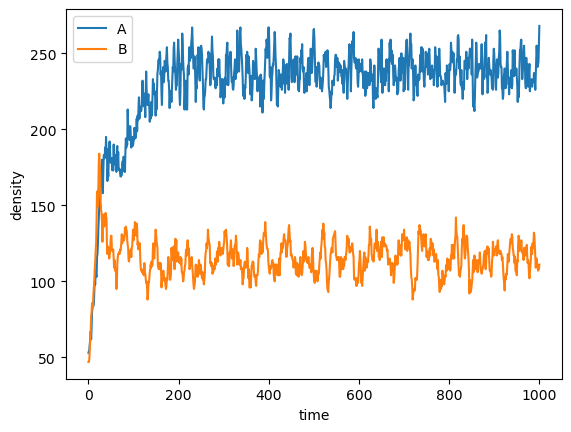

In [184]:
N = np.array(Na)+ np.array(Nb)
ts = range(t_max+1)
fig, ax = plt.subplots()
ax.plot(ts, Na, label='A')
ax.plot(ts, Nb, label='B')
# ax.plot(ts, N, label='Total N')
ax.set_xlabel('time')
ax.set_ylabel('density')
plt.legend()
plt.show()

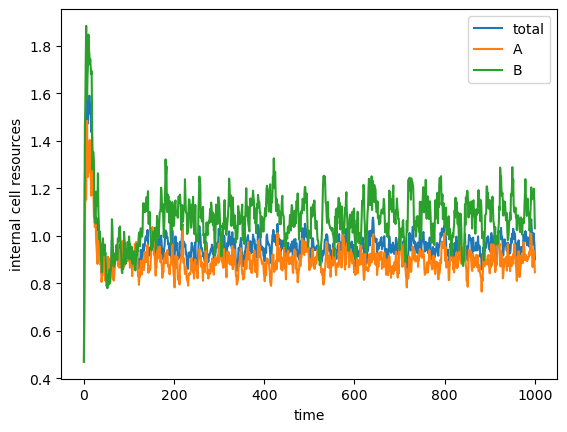

In [185]:
fig, ax = plt.subplots()
ax.plot(ts, R, label='total')
ax.plot(ts, Ra, label='A')
ax.plot(ts, Rb, label='B')
ax.set_xlabel('time')
ax.set_ylabel('internal cell resources')
plt.legend()
plt.show()

### p(a) over time

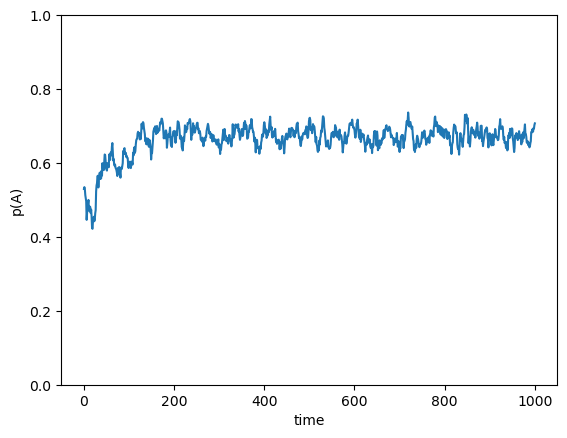

In [186]:
fig, ax = plt.subplots()
ax.plot(ts, freqA)
ax.set_xlabel('time')
ax.set_ylabel('p(A)')
ax.set_ylim(0,1)
plt.show()

### Mean Trait Value

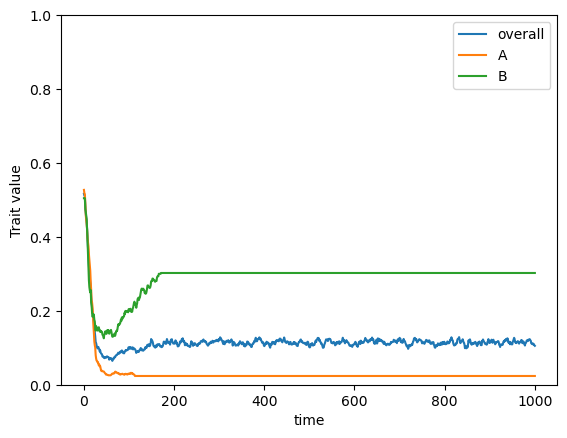

In [187]:
fig, ax = plt.subplots()
ax.plot(ts, mean_trait, label='overall')
ax.plot(ts, trait_a, label='A')
ax.plot(ts, trait_b, label='B')
ax.set_xlabel('time')
ax.set_ylabel('Trait value')
ax.set_ylim(0,1)
plt.legend()
plt.show()

### Number of dormant cells over time

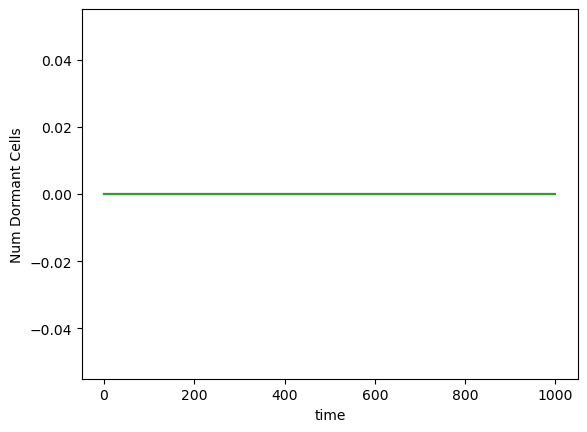

In [188]:
fig, ax = plt.subplots()
ax.plot(range(1, t_max+1), D[1:len(D)], label='total')
ax.plot(range(1, t_max+1), Da[1:len(D)], label='A')
ax.plot(range(1, t_max+1), Db[1:len(D)], label='B')
ax.set_xlabel('time')
ax.set_ylabel('Num Dormant Cells')
plt.show()

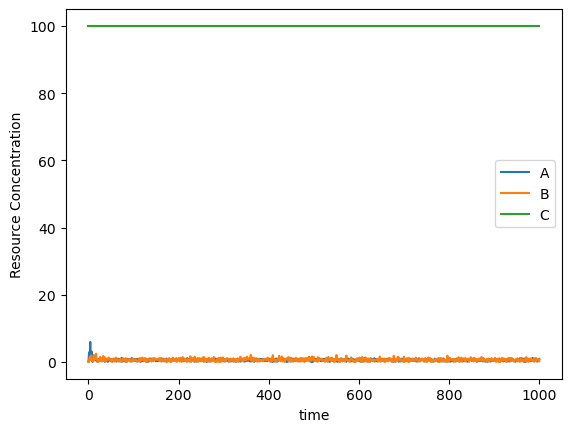

In [189]:
fig, ax = plt.subplots()
ax.plot(ts, r_a, label='A')
ax.plot(ts, r_b, label='B')
ax.plot(ts, r_c, label='C')
ax.set_xlabel('time')
ax.set_ylabel('Resource Concentration')
plt.legend()
plt.show()